In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_train.shape

(614, 13)

In [3]:
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test.shape

(367, 12)

In [4]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [6]:
df = df_train.append(df_test)
df.shape

C:\Users\GAURAV\AppData\Local\Temp\ipykernel_8044\3694898599.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


(981, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [11]:
df.drop('Loan_ID', axis=1, inplace=True)

## Feature Engineering

### Dependents

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [14]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [15]:
df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [16]:
df['Dependents'] = df['Dependents'].fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 99.6+ KB


### Gender

In [18]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [20]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [21]:
df['Gender'] = df['Gender'].fillna(1)

### Married

In [22]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [24]:
df['Married']= df['Married'].map({'Yes':1,'No':0})

In [25]:
df['Married'] = df['Married'].fillna(1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 99.6+ KB


### Education 

In [27]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})

In [29]:
df.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

### Self_Employed

In [31]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [32]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [33]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})

In [36]:
df['Self_Employed'] = df['Self_Employed'].fillna(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    float64
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 99.6+ KB


### Property_Area

In [38]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [42]:
df['Property_Area'].unique()

array([2, 0, 1])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    float64
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 95.8+ KB


### Loan_Status

In [44]:
 df['Loan_Status'].unique()

array(['Y', 'N', nan], dtype=object)

In [45]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

In [46]:
df['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

### Credit History

In [58]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [54]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [55]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [57]:
df['Credit_History'] = df['Credit_History'].fillna(1)

### Loan Amount Term

In [59]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

In [62]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [63]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)

### Loan Ammount

In [66]:
df['LoanAmount'].isnull().sum()

27

F:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

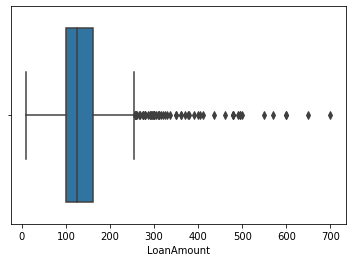

In [67]:
sns.boxplot(df['LoanAmount'])

In [72]:
df['LoanAmount'].mean()

142.51153039832286

In [73]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

### Credit History

In [75]:
df['Credit_History'].unique()

array([1., 0.])

In [76]:
df['Credit_History'].value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [80]:
df['Credit_History'] = df['Credit_History'].fillna(1)

In [83]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## Separating Training and Testing Set

In [87]:
test = df[df['Loan_Status'].isnull()].drop('Loan_Status', axis = 1)

In [91]:
print(test.shape)
test.sample(2)

(367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
352,1.0,1.0,0.0,1,0.0,5817,910.0,109.0,360.0,1.0,2
72,1.0,1.0,1.0,1,0.0,4083,1775.0,139.0,60.0,1.0,2


In [89]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [90]:
train = df[~(df['Loan_Status'].isnull())]
print(train.shape)
train.sample(2)

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
567,1.0,1.0,3.0,1,0.0,3400,2500.000000,123.0,360.0,0.0,0,0.0
282,1.0,1.0,2.0,1,0.0,2301,985.799988,78.0,180.0,1.0,2,1.0


## We are Done with the feature Engineering and Train Test Separation